In [1]:
## Import statement: pandas is a "package"
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import statsmodels.formula.api as smf


In [3]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

In [4]:
df_spam = pd.read_csv("data/models/classification/email.csv")
df_spam.head(3)

,spam,to_multiple,from,cc,sent_email,time,image,attach,dollar,winner,...,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,0,1,0,0,2012-01-01T06:16:41Z,0,0,0,no,...,0,0,11.370,202,1,0,0,0,0,big
1,0,0,1,0,0,2012-01-01T07:03:59Z,0,0,0,no,...,0,0,10.504,202,1,0,0,0,1,small
2,0,0,1,0,0,2012-01-01T16:00:32Z,0,0,4,no,...,0,0,7.773,192,1,0,0,0,6,small


In [5]:
df_spam.shape

(3921, 21)

In [6]:
df_spam['spam'].mean()

0.09359857179290997

In [8]:
.5/.5

1.0

Text(0.5, 1.0, 'Odds(y) vs. P(y)')

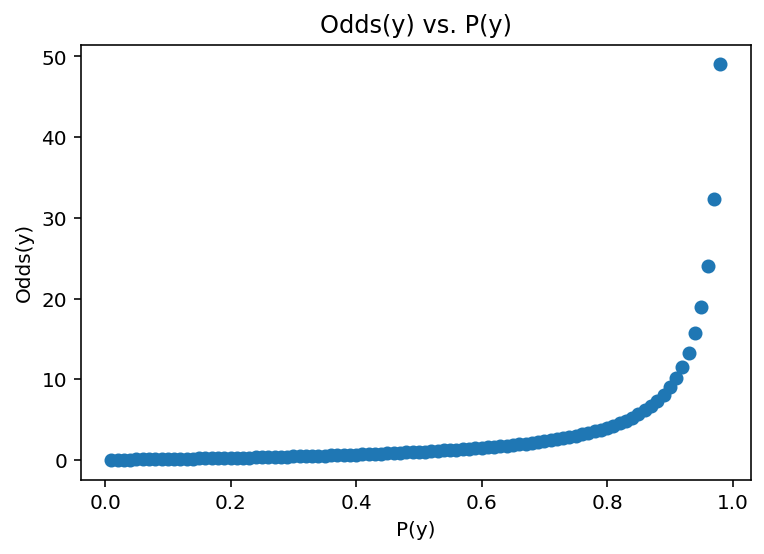

In [9]:
p = np.arange(.01, .99, .01)
odds = p / (1 - p)
plt.scatter(p, odds)
plt.xlabel("P(y)")
plt.ylabel("Odds(y)")
plt.title("Odds(y) vs. P(y)")

Text(0.5, 1.0, 'Log-odds(y) vs. P(y)')

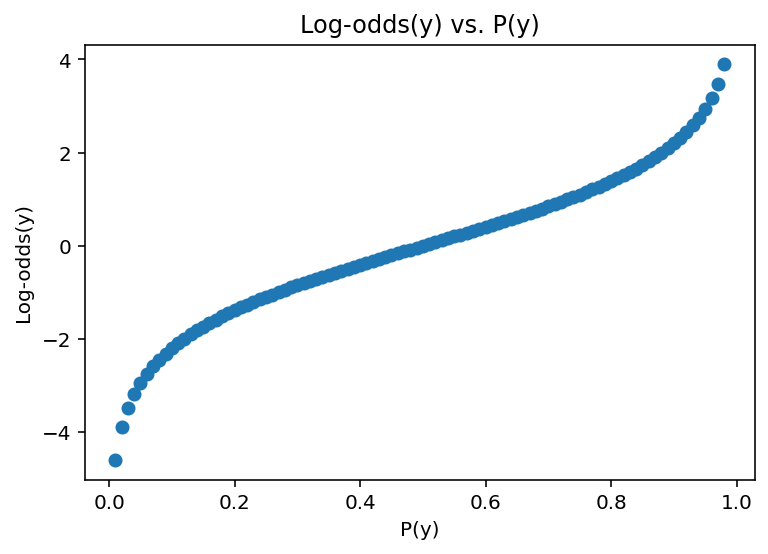

In [12]:
lo = np.log(p / (1 - p))
plt.scatter(p, lo)
plt.xlabel("P(y)")
plt.ylabel("Log-odds(y)")
plt.title("Log-odds(y) vs. P(y)")

In [16]:
np.exp(-1) / (np.exp(-1) + 1)

0.2689414213699951

Text(0.5, 1.0, 'Log-odds(Y) vs. P(Y)')

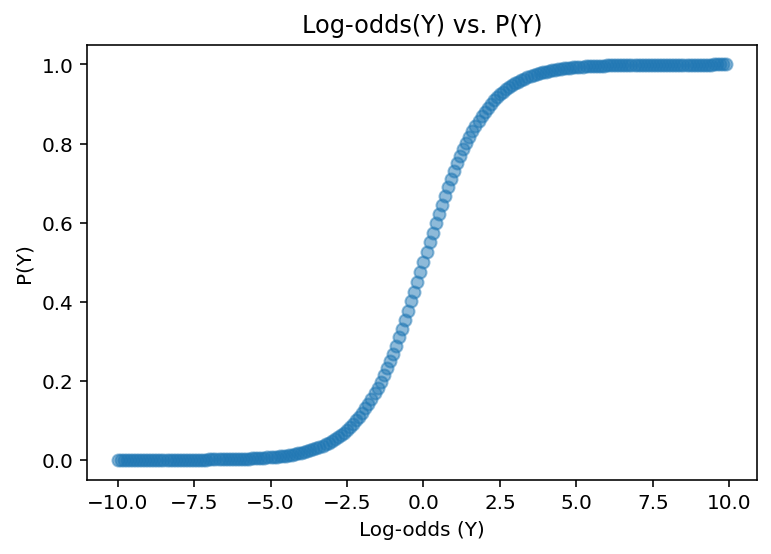

In [17]:
log_odds = np.arange(-10, 10, .1)
p = np.exp(log_odds) / (1 + np.exp(log_odds))
plt.scatter(log_odds, p, alpha = .5)
plt.xlabel("Log-odds (Y)")
plt.ylabel("P(Y)")
plt.title("Log-odds(Y) vs. P(Y)")

In [18]:
mod_len = smf.logit(data = df_spam, formula = "spam ~ num_char").fit()
mod_len.summary()

Optimization terminated successfully.
         Current function value: 0.299210
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   spam   No. Observations:                 3921
Model:                          Logit   Df Residuals:                     3919
Method:                           MLE   Df Model:                            1
Date:                Wed, 08 Mar 2023   Pseudo R-squ.:                 0.03725
Time:                        14:41:31   Log-Likelihood:                -1173.2
converged:                       True   LL-Null:                       -1218.6
Covariance Type:            nonrobust   LLR p-value:                 1.607e-21
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7987      0.072    -25.135      0.000      -1.939      -1.658
num_char      -0.0621      0.008     -7.746      0.000      -0.078      -0.046
==============================================================================
"""

In [19]:
mod_len.params

Intercept   -1.798738
num_char    -0.062071
dtype: float64

In [20]:
np.exp(-1.8) / (1 + np.exp(-1.8))

0.1418510649004878

In [21]:
100 * -.06 - 1.8

-7.8

In [22]:
np.exp(-7.8) / (1 + np.exp(-7.8))

0.00040956716498605043

In [23]:
mod_winner = smf.logit(data = df_spam, formula = "spam ~ winner").fit()
mod_winner.summary()

Optimization terminated successfully.
         Current function value: 0.307661
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   spam   No. Observations:                 3921
Model:                          Logit   Df Residuals:                     3919
Method:                           MLE   Df Model:                            1
Date:                Wed, 08 Mar 2023   Pseudo R-squ.:                 0.01005
Time:                        14:48:28   Log-Likelihood:                -1206.3
converged:                       True   LL-Null:                       -1218.6
Covariance Type:            nonrobust   LLR p-value:                 7.410e-07
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.3140      0.056    -41.121      0.000      -2.424      -2.204
winner[T.yes]     1.5256      0.275      5.538      0.000       0.986       2.066
=================================================================================
"""

In [24]:
mod_winner.params

Intercept       -2.314047
winner[T.yes]    1.525589
dtype: float64

In [25]:
np.exp(-2.3) / (1 + np.exp(-2.3))

0.09112296101485615

In [26]:
-2.3 + 1.5

-0.7999999999999998

In [27]:
np.exp(-.79) / (1 + np.exp(-.79))

0.3121686694171596